# Superstore Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('SuperStoreData.csv')
df.head(2)

,RowId,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [5]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [6]:
df.drop('RowId', axis=1, inplace=True)

In [7]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2021,11
1,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2021,11
2,CA-2021-138688,2021-06-12,2021-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2021,6


## 1. Exploratory Data Analysis -

### a. Check the summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9994 non-null   object        
 1   Order Date      9994 non-null   datetime64[ns]
 2   Ship Date       9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Segment         9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Product ID      9994 non-null   object        
 13  Category        9994 non-null   object        
 14  Sub-Category    9994 non-null   object        
 15  Prod

From above summery, can see there are some null values in Postal Code column. 4 float, 2 integer, 13 objcet and 2 datetime columns are in dataset. Memory usage by dataset is 1.6+ MB

### b. Shape of the dataset

In [9]:
df.shape

(9994, 22)

In Superstore dataset there are 9994 rows and 22 columns

### c. Statistical summary

In [10]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Year,Month
count,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2021-04-30 05:17:08.056834304,2021-05-04 04:17:20.304182528,55245.233297,229.858001,3.789574,0.156203,28.656896,2020.722233,7.809686
min,2019-01-03 00:00:00,2019-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2019.000000,1.000000
25%,2020-05-23 00:00:00,2020-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2020.000000,5.000000
50%,2021-06-26 00:00:00,2021-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500,2021.000000,9.000000
75%,2022-05-14 00:00:00,2022-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2022.000000,11.000000
max,2022-12-30 00:00:00,2023-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2022.000000,12.000000
std,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654


Above summery tells the mean, maxixum, minumum, standard daviation, counts and percentile of each numerical columns

### d. Display all numerical and categorical columns

Categorical columns

In [11]:
df_categorical = df.select_dtypes(include='object')
df_categorical.head(3)

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2021-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2021-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2021-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...


Numerical columns

In [12]:
df_numerical = df.select_dtypes(include=['float','int'])
df_numerical.head()

,Postal Code,Sales,Quantity,Discount,Profit,Year,Month
0,42420.0,261.9600,2,0.00,41.9136,2021,11
1,42420.0,731.9400,3,0.00,219.5820,2021,11
2,90036.0,14.6200,2,0.00,6.8714,2021,6
3,33311.0,957.5775,5,0.45,-383.0310,2020,10
4,33311.0,22.3680,2,0.20,2.5164,2020,10


Correlation 

In [13]:
df_numerical.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Year,Month
Postal Code,1.000000,-0.022346,0.013376,0.057243,-0.028751,0.005146,0.024372
Sales,-0.022346,1.000000,0.200795,-0.028190,0.479064,-0.009679,-0.000625
Quantity,0.013376,0.200795,1.000000,0.008623,0.066253,-0.005810,0.023355
Discount,0.057243,-0.028190,0.008623,1.000000,-0.219487,-0.002662,-0.004935
Profit,-0.028751,0.479064,0.066253,-0.219487,1.000000,0.004670,-0.000502
Year,0.005146,-0.009679,-0.005810,-0.002662,0.004670,1.000000,-0.020183
Month,0.024372,-0.000625,0.023355,-0.004935,-0.000502,-0.020183,1.000000


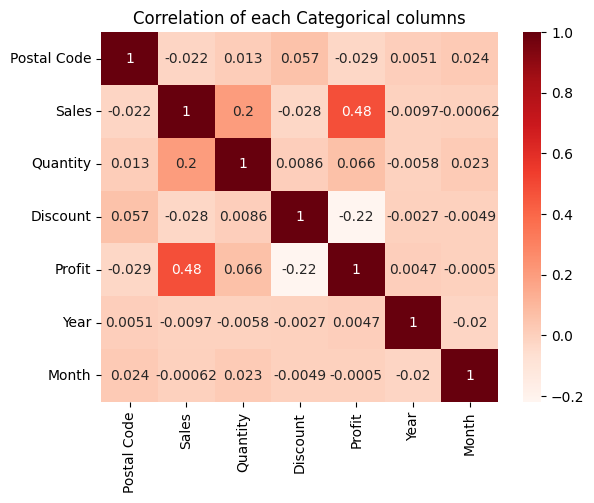

In [14]:
sns.heatmap(df_numerical.corr(), cmap= "Reds", annot=True)
plt.title('Correlation of each Categorical columns')
plt.show()

### e. Check for missing values if any

In [15]:
df.isna().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
Year               0
Month              0
dtype: int64

There are no mission values except Postal Code

## 2. Solve - 

### a. What are the top 5 most frequently ordered products?

In [16]:
top_product = df['Product Name'].value_counts().reset_index().head()
top_product

,Product Name,count
0,Staple envelope,48
1,Staples,46
2,Easy-staple paper,46
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,19


 Top 5 most frequently ordered products

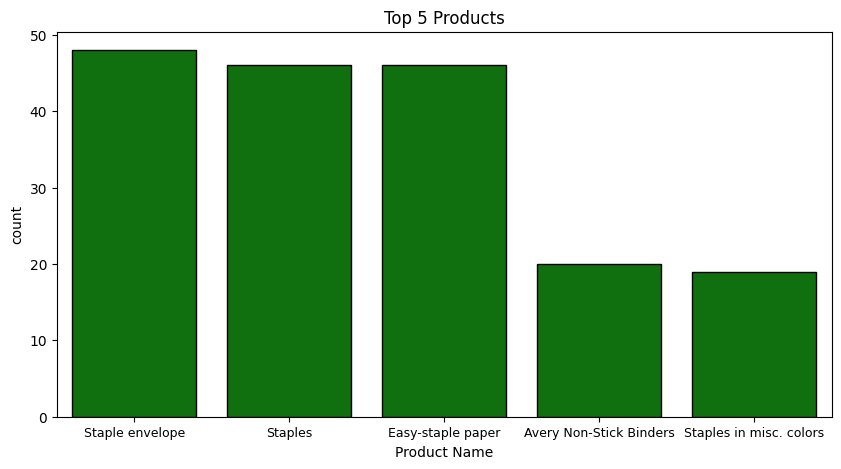

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_product['Product Name'], y=top_product['count'], color='green', edgecolor='black')
plt.xticks(fontsize=9)
plt.title('Top 5 Products')
plt.show()

### b. How many unique customers are there, and which customer has placed the most orders?

In [18]:
unique_customer = df['Customer Name'].nunique()
print(f"There are '{unique_customer}' unique customers")

There are '793' unique customers


Top 5 people who placed the most orders

In [19]:
top_customers = df['Customer Name'].value_counts().head().reset_index()
top_customers

,Customer Name,count
0,William Brown,37
1,Matt Abelman,34
2,John Lee,34
3,Paul Prost,34
4,Chloris Kastensmidt,32


In [20]:
customer_name = top_customers.iloc[0,0]
no_of_order = top_customers.iloc[0,1]
print(f"'{customer_name}' has placed '{no_of_order}' orders")

'William Brown' has placed '37' orders


### c. How do monthly or yearly sales trends look over time?

In [21]:
year_month_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
year_month_sales.head()

,Year,Month,Sales
0,2019,1,14236.895
1,2019,2,4519.892
2,2019,3,55691.009
3,2019,4,28295.345
4,2019,5,23648.287


In [22]:
y19 = year_month_sales[year_month_sales['Year'] == 2019]
y20 = year_month_sales[year_month_sales['Year'] == 2020]
y21 = year_month_sales[year_month_sales['Year'] == 2021]
y22 = year_month_sales[year_month_sales['Year'] == 2022]

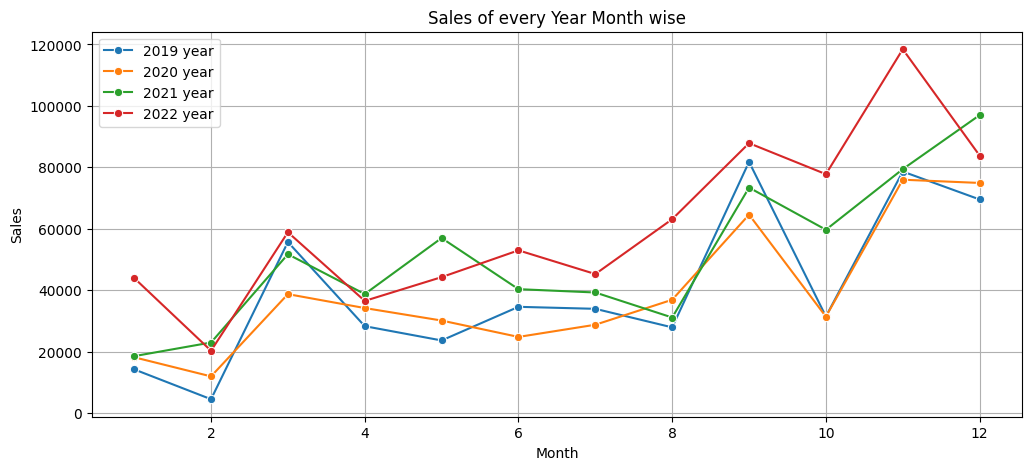

In [23]:
plt.figure(figsize=(12,5))
sns.lineplot(x=y19['Month'] ,y=y19['Sales'], marker='o', label = '2019 year')
sns.lineplot(x=y20['Month'] ,y=y20['Sales'], marker='o', label = '2020 year')
sns.lineplot(x=y21['Month'] ,y=y21['Sales'], marker='o', label = '2021 year')
sns.lineplot(x=y22['Month'] ,y=y22['Sales'], marker='o', label = '2022 year')
plt.title('Sales of every Year Month wise')
plt.grid()
plt.show()

### d. What are the peak and low sales months for each year?

Maximum Sales of every year month wise

In [24]:
max_sales = year_month_sales.loc[year_month_sales.groupby('Year')['Sales'].idxmax()]
max_sales

,Year,Month,Sales
8,2019,9,81777.3508
22,2020,11,75972.5635
35,2021,12,96999.0430
46,2022,11,118447.8250


Minimum Sales of every year month wise

In [25]:
min_sales = year_month_sales.loc[year_month_sales.groupby('Year')['Sales'].idxmin()]
min_sales

,Year,Month,Sales
1,2019,2,4519.8920
13,2020,2,11951.4110
24,2021,1,18542.4910
37,2022,2,20301.1334


In [26]:
min_max_sales = max_sales.merge(min_sales, on='Year')
min_max_sales = min_max_sales.rename({'Month_x':'Max_s_Month','Month_y':'Min_s_Month','Sales_x':'Max_Sales','Sales_y':'Min_Sales'}, axis=1)
min_max_sales

,Year,Max_s_Month,Max_Sales,Min_s_Month,Min_Sales
0,2019,9,81777.3508,2,4519.8920
1,2020,11,75972.5635,2,11951.4110
2,2021,12,96999.0430,1,18542.4910
3,2022,11,118447.8250,2,20301.1334


## 3. Category-Based Analysis -

### a. What are the top-selling categories and sub-categories?

#### Top-selling categories on the bases of order

In [27]:
categories_count = df['Category'].value_counts().reset_index()
categories_count

,Category,count
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


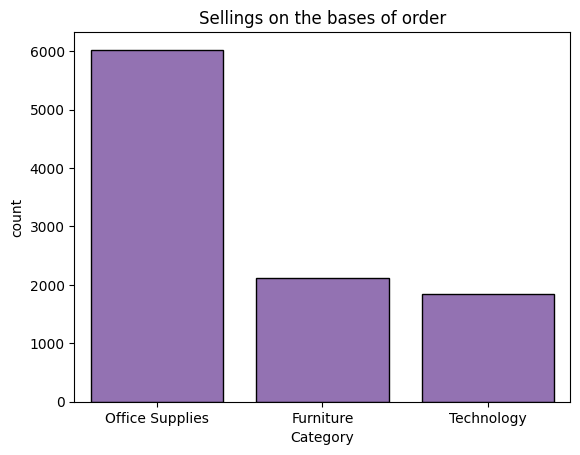

In [28]:
sns.barplot(x=categories_count['Category'], y=categories_count['count'], color='C4', edgecolor='black')
plt.title('Sellings on the bases of order')
plt.show()

#### Top-selling categories on the bases of revenue

In [29]:
categories_revenue = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
categories_revenue

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


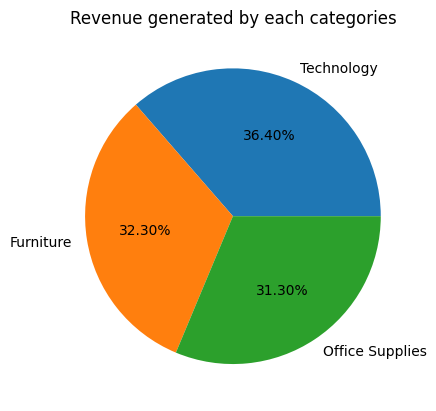

In [30]:
plt.pie(x = categories_revenue['Sales'],
        labels = categories_revenue['Category'],
        autopct = '%.2f%%')
plt.title('Revenue generated by each categories')
plt.show()

#### 10 Top selling Sub-Categories on the bases of order

In [31]:
sub_category_count = df['Sub-Category'].value_counts().reset_index().head(10)
sub_category_count

,Sub-Category,count
0,Binders,1523
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,466
9,Labels,364


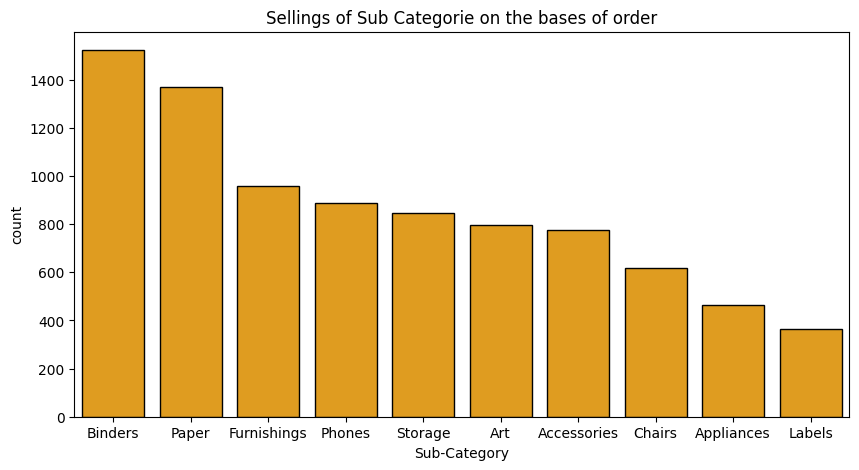

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x = sub_category_count['Sub-Category'],
            y = sub_category_count['count'],
            color = 'orange',
            edgecolor = 'black')
plt.title('Sellings of Sub Categorie on the bases of order')
plt.show()

#### 10 Top selling Sub-Categories on the bases of revenue

In [33]:
sub_categories_revenue = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
sub_categories_revenue

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


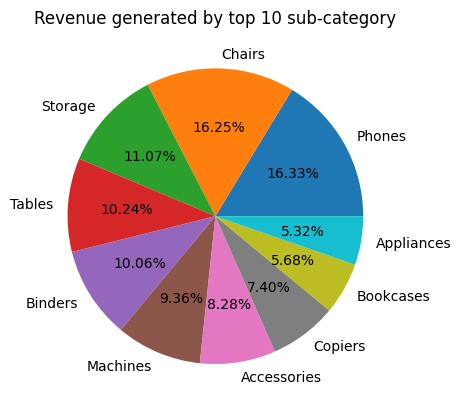

In [34]:
plt.pie(x = sub_categories_revenue['Sales'],
        labels = sub_categories_revenue['Sub-Category'],
        autopct = '%.2f%%')
plt.title('Revenue generated by top 10 sub-category')
plt.show()

#### Sub-Categories of each Categories

In [35]:
category_count = df.groupby(['Category','Sub-Category'])['Sub-Category'].value_counts().reset_index()
category_count

,Category,Sub-Category,count
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364


#### Sub-Categories of Furniture

In [36]:
furniture = category_count[category_count['Category'] == 'Furniture']
furniture

,Category,Sub-Category,count
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319


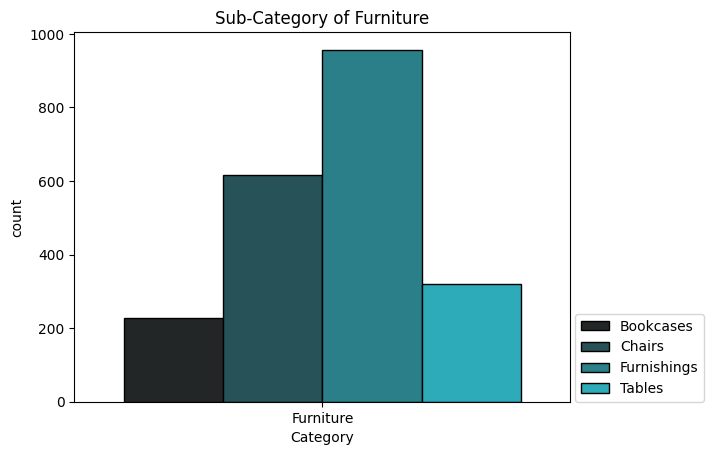

In [37]:
sns.barplot(x=furniture['Category'], 
            y=furniture['count'], 
            hue = furniture['Sub-Category'] , 
            color='C9', 
            edgecolor='black')
plt.title('Sub-Category of Furniture')
plt.legend(loc=(1.01,0))
plt.show()

#### Sub-Categories of Office Supplies

In [38]:
office_suplies = category_count[category_count['Category'] == 'Office Supplies']
office_suplies

,Category,Sub-Category,count
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364
10,Office Supplies,Paper,1370
11,Office Supplies,Storage,846
12,Office Supplies,Supplies,190


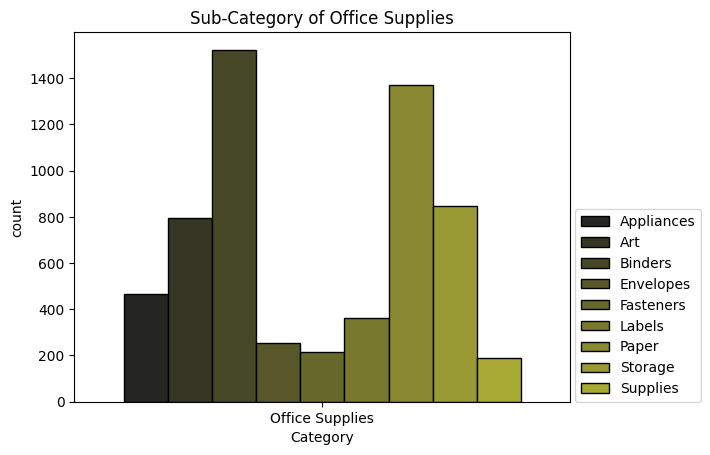

In [39]:
sns.barplot(x=office_suplies['Category'], 
            y=office_suplies['count'], 
            hue = office_suplies['Sub-Category'] , 
            color='C8', 
            edgecolor='black')
plt.title('Sub-Category of Office Supplies')
plt.legend(loc=(1.01,0))
plt.show()

#### Sub-Categories of Technology

In [40]:
technology = category_count[category_count['Category'] == 'Technology']
technology

,Category,Sub-Category,count
13,Technology,Accessories,775
14,Technology,Copiers,68
15,Technology,Machines,115
16,Technology,Phones,889


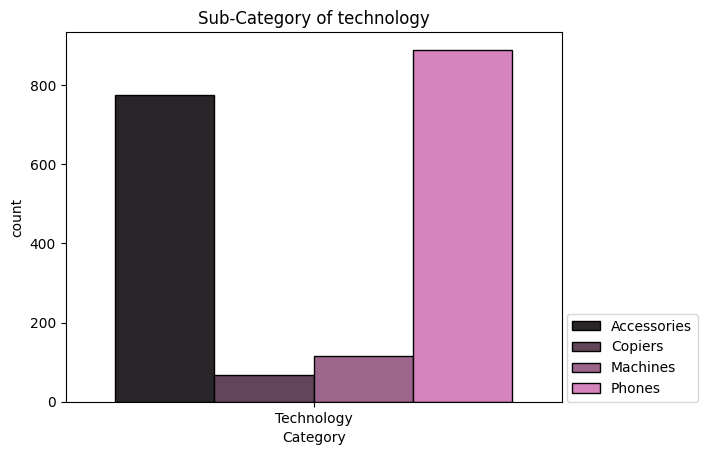

In [41]:
sns.barplot(x=technology['Category'], 
            y=technology['count'], 
            hue = technology['Sub-Category'] , 
            color='C6', 
            edgecolor='black')
plt.title('Sub-Category of technology')
plt.legend(loc=(1.01,0))
plt.show()

### b. How does the average order quantity vary across different categories?

In [42]:
ave_quantity = round(df.groupby('Category')['Quantity'].mean(),2).reset_index()
ave_quantity.rename({'Quantity':'Ave_Quantity'}, axis=1, inplace=True)
ave_quantity

,Category,Ave_Quantity
0,Furniture,3.79
1,Office Supplies,3.80
2,Technology,3.76


## 4. Sales Performance by Region -

### a. Which region has the highest sales, and how do sales compare across regions?

In [43]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
region_sales

,Region,Sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


In [44]:
region = region_sales.iloc[0,0]
sales = region_sales.iloc[0,1]
print(f"'{region}' region has highest sales of '{sales}'")

'West' region has highest sales of '725457.8245'


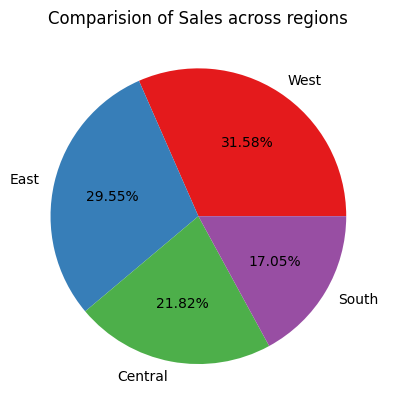

In [45]:
plt.pie(x = region_sales['Sales'], 
        labels = region_sales['Region'], 
        autopct = '%.2f%%',
        colors = sns.color_palette('Set1'))
plt.title('Comparision of Sales across regions')
plt.show()

## b. What is the distribution of sales across different states and cities?

#### Sales of different states

In [46]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
state_sales.head()

,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


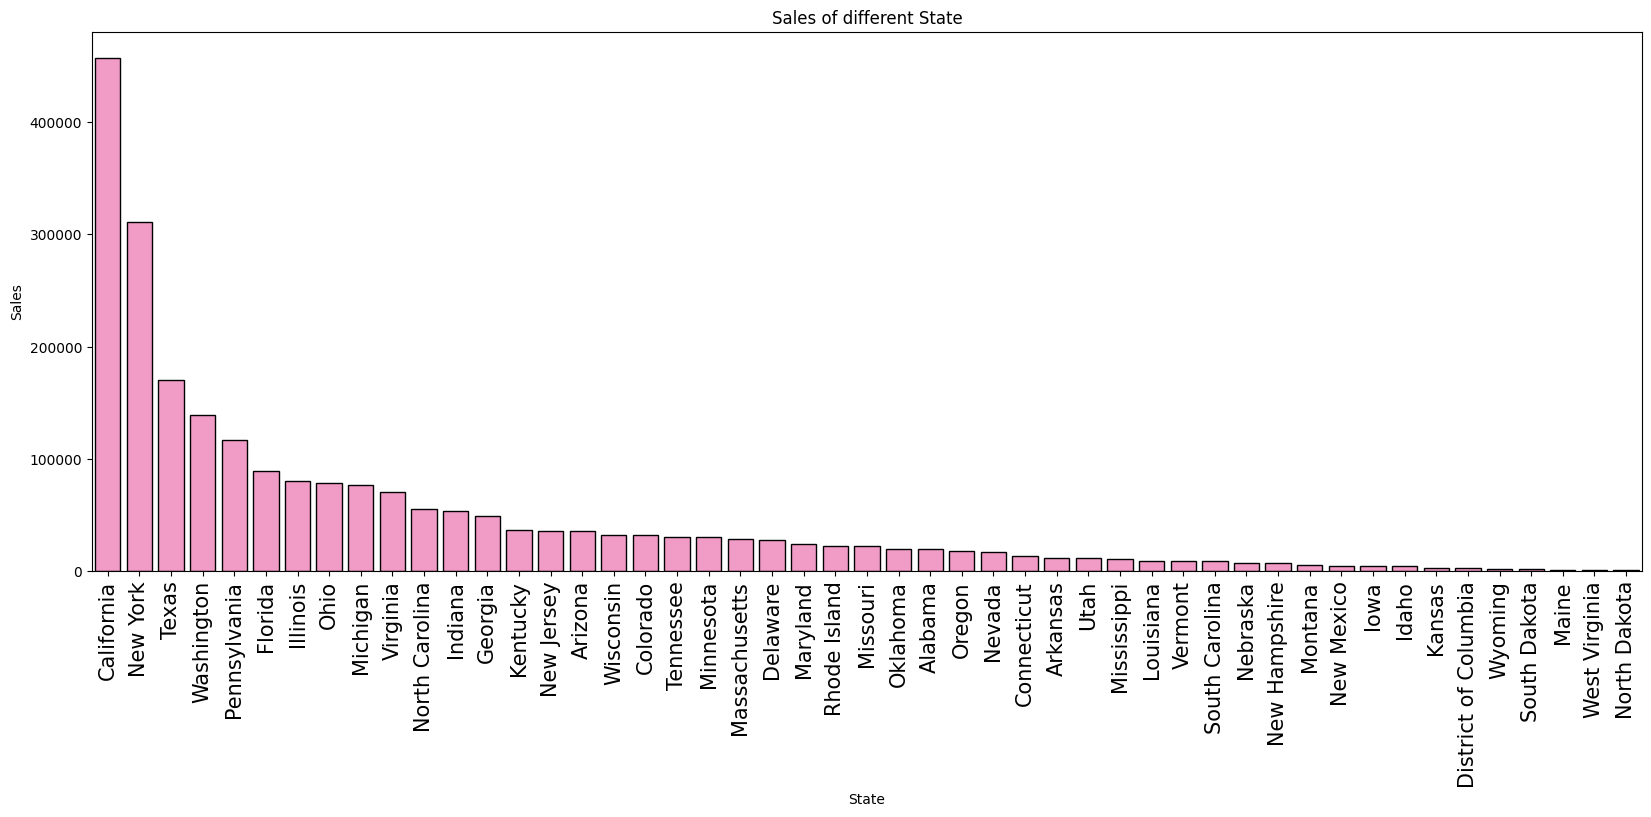

In [47]:
plt.figure(figsize=(20,7))
sns.barplot(x=state_sales['State'], y=state_sales['Sales'], color='#FF8DC7', edgecolor='black')
plt.xticks(rotation=90,fontsize=15)
plt.title('Sales of different State')
plt.show()

#### Sales of top 10 cities

In [48]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
city_sales

,City,Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


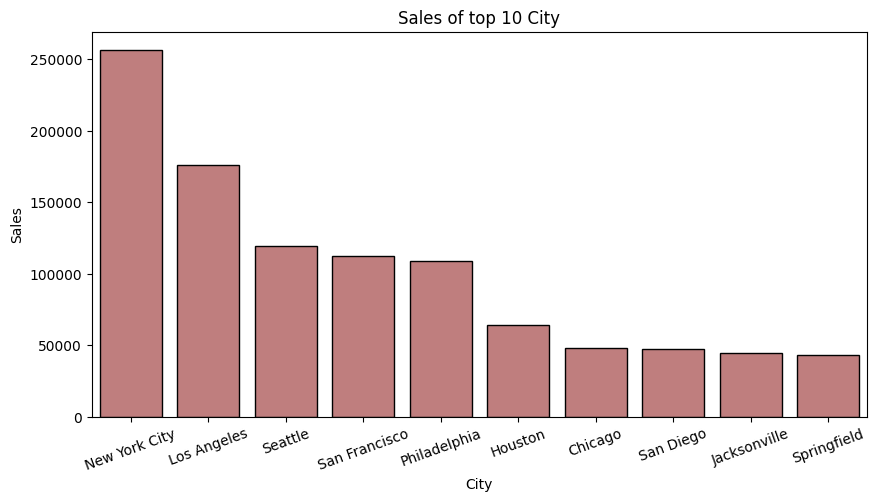

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=city_sales['City'] ,y=city_sales['Sales'],edgecolor='black' , color='#CA7373')
plt.xticks(rotation=20)
plt.title('Sales of top 10 City')
plt.show()

## 5. Customer Segmentation - 

### a. What is the distribution of customers across segments (e.g., Consumer, Corporate)?

In [50]:
segment = df.groupby('Segment')['Customer Name'].count().reset_index()
segment.rename({'Customer Name':'Total Customer'}, axis=1, inplace=True)
segment

,Segment,Total Customer
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


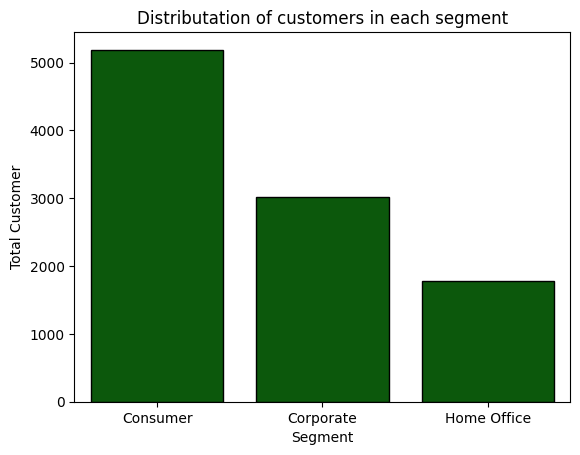

In [51]:
sns.barplot(x=segment['Segment'],y=segment['Total Customer'], color='darkgreen', edgecolor='black')
plt.title('Distributation of customers in each segment')
plt.show()

### b. Who are the top customers in each segment based on total sales or order count?

Top customers on the bases on sales

In [52]:
top_customer_sales = df.groupby(['Segment','Customer Name'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False).head(3)
top_customer_sales

,Segment,Customer Name,Sales
771,Home Office,Sean Miller,25043.050
627,Corporate,Tamara Chand,19052.218
316,Consumer,Raymond Buch,15117.339


Top customers on the bases on order

In [53]:
customer_order = df.groupby(['Segment','Customer Name'])['Sales'].count().reset_index()
customer_order.rename({'Sales':'Total Order'}, axis=1, inplace=True)
customer_order.head()

,Segment,Customer Name,Total Order
0,Consumer,Aaron Bergman,6
1,Consumer,Adam Shillingsburg,25
2,Consumer,Adrian Barton,20
3,Consumer,Aimee Bixby,12
4,Consumer,Alan Barnes,14


In [54]:
segment_customer_order = customer_order.loc[customer_order.groupby('Segment')['Total Order'].idxmax()]
segment_customer_order

,Segment,Customer Name,Total Order
405,Consumer,William Brown,37
488,Corporate,Edward Hooks,32
727,Home Office,Matt Abelman,34
